# Exploring Weather Trends

<b>Goal:</b> analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

<b>What tools did I use for each step?</b>

I used SQL for getting the data and python for data visualization 

SQL-Code to get citys in Germany:

I live near Munich, so now I can get the data for Munich

SQL-Code to extract the global data:

<p><b>Data visualization in Python:</b></p>
<p>Import the relevant libraries</p>

In [18]:
import numpy as np #calculating moving average etc.
import pandas as pd #dataframes to hold the data
import matplotlib.pyplot as plt #for data visualization
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' #produces visualization with a higher resolution

In [2]:
#Load the data
city_data = pd.read_csv('city_data.csv')
global_data = pd.read_csv('global_data.csv')

Exploring the data

In [3]:
city_data.head()

,year,city,country,avg_temp
0,1743,Munich,Germany,1.32
1,1744,Munich,Germany,6.09
2,1745,Munich,Germany,-2.15
3,1746,Munich,Germany,NaN
4,1747,Munich,Germany,NaN


In [4]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [5]:
city_data['year'].describe()

count     271.000000
mean     1878.000000
std        78.375166
min      1743.000000
25%      1810.500000
50%      1878.000000
75%      1945.500000
max      2013.000000
Name: year, dtype: float64

In [6]:
global_data['year'].describe()

count     266.000000
mean     1882.500000
std        76.931788
min      1750.000000
25%      1816.250000
50%      1882.500000
75%      1948.750000
max      2015.000000
Name: year, dtype: float64

<p>It appears that there are different start and end years, so in the next step I will edit both DataFrames to get matching dates</p>
<p>city_data: min:1743 / max:2013</p>
<p>global_data: min:1750 / max:2015</p> 

In [7]:
city_data.drop(city_data.index[0:7], inplace=True)

In [8]:
global_data.drop(global_data.index[[264,265]], inplace=True)

Now both DataFrames have the same year range

In [9]:
city_data['year'].describe()

count     264.000000
mean     1881.500000
std        76.354437
min      1750.000000
25%      1815.750000
50%      1881.500000
75%      1947.250000
max      2013.000000
Name: year, dtype: float64

In [10]:
global_data['year'].describe()

count     264.000000
mean     1881.500000
std        76.354437
min      1750.000000
25%      1815.750000
50%      1881.500000
75%      1947.250000
max      2013.000000
Name: year, dtype: float64

<b>Calculting the Moving average</b>

In [11]:
city_data['MA_5'] = city_data['avg_temp'].rolling(window=5).mean()

In [12]:
global_data['MA_5'] = global_data['avg_temp'].rolling(window=5).mean()

Eplanation: 
- 'rolling()' is a pandas function to add window calculations 
- 'window' is the number of observation that are included in the window
- 'mean() is a numoy function to compute the arithmetic mean

<p><b>Visualization of the data</b></p>
<p>I added some annotations the illustrate important datapoints</p>

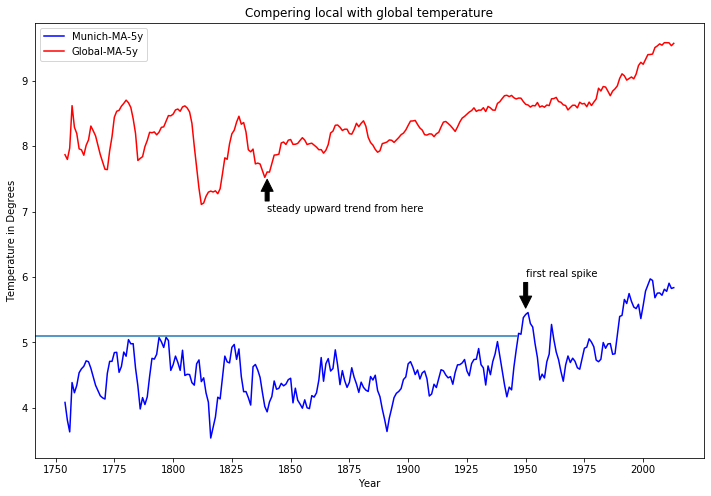

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(city_data['year'], city_data['MA_5'], color='b', label='Munich-MA-5y')
ax.plot(global_data['year'], global_data['MA_5'], color ='r', label='Global-MA-5y')

ax.annotate('steady upward trend from here', xy=(1840, 7.5), xytext=(1840, 7), 
            arrowprops=dict(facecolor='black', shrink=0.02))

ax.annotate('first real spike', xy=(1950, 5.5), xytext=(1950, 6),arrowprops=dict(facecolor='black', 
                                                                                 shrink=0.05))
ax.axhline(y=5.1, xmax=0.72)

ax.set_title('Compering local with global temperature')
plt.xticks(np.arange(min(city_data['year']), max(city_data['year']), 25)) #set x-ticks in a 25 intervall
plt.xlabel('Year')
plt.ylabel('Temperature in Degrees')
plt.legend()

<b>Oberservations</b>

1. the general trend is the same between Munich and the World, but there are more fluctuations in Munich
2. the global temperature is about 4 degrees warmer (looking at the mean, max and min of each plot)
3. the global temperature has a more clear upward trend after approx. 1840
4. the spike around 1950 is the first to break previous temperature highs in Munich
5. you can see an accelerated temperature raising from apporx. 1975 in global temperatures and from approx. 1985 in Munich

<b>Further analysis</b>

In [14]:
city_data['MA_5'].describe()

count    260.000000
mean       4.636115
std        0.469132
min        3.538000
25%        4.340500
50%        4.578000
75%        4.824500
max        5.970000
Name: MA_5, dtype: float64

In [15]:
global_data['MA_5'].describe()

count    260.000000
mean       8.353785
std        0.479805
min        7.108000
25%        8.043000
50%        8.317000
75%        8.624000
max        9.580000
Name: MA_5, dtype: float64

<b>Correlation betwenn global and local temperatures</b>

In [16]:
city_data['MA_5'].corr(global_data['MA_5'])

0.630181694851265

there is a positive correlation between global temperature and local temperature in Munich. A correlation coefficient of 0.63 means that there is a positive moderate relationship. When correlating the annual data the correlation is 0.33. We get a lower number because there is more fluctuations.

In [17]:
city_data['avg_temp'].corr(global_data['avg_temp'])

0.32571942719272107

<b>Can you estimate the average temperature in your city based on the average global temperature?</b>
- Yes, you can. The mean is about 4 degrees lower (even when you look at max and min points) than the global temperature so you can just subtract 4 from the global temperature and get a pretty accurate estimation of the temperature in Munich and there is also a moderate correlation.